In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv('HRDataset.csv')

In [3]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
df.shape

(311, 36)

In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
df.iloc[df['Salary'].idxmax()]

Employee_Name                        King, Janet
EmpID                                      10089
MarriedID                                      1
MaritalStatusID                                1
GenderID                                       0
EmpStatusID                                    1
DeptID                                         2
PerfScoreID                                    3
FromDiversityJobFairID                         0
Salary                                    250000
Termd                                          0
PositionID                                    16
Position                         President & CEO
State                                         MA
Zip                                         1902
DOB                                     09/21/54
Sex                                            F
MaritalDesc                              Married
CitizenDesc                           US Citizen
HispanicLatino                               Yes
RaceDesc            

In [7]:
df.iloc[df['Salary'].idxmin()]

Employee_Name                           Zima, Colleen
EmpID                                           10271
MarriedID                                           0
MaritalStatusID                                     4
GenderID                                            0
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         3
FromDiversityJobFairID                              0
Salary                                          45046
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1730
DOB                                          08/17/78
Sex                                                 F
MaritalDesc                                   Widowed
CitizenDesc                 

In [8]:
df.iloc[df['Absences'].idxmax()]

Employee_Name                           Bates, Norman
EmpID                                           10061
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         4
DeptID                                              5
PerfScoreID                                         3
FromDiversityJobFairID                              0
Salary                                          57834
Termd                                               1
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              2050
DOB                                          10/18/81
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [9]:
df.iloc[df['Absences'].idxmin()]

Employee_Name                     Adinolfi, Wilson  K
EmpID                                           10026
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         4
FromDiversityJobFairID                              0
Salary                                          62506
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1960
DOB                                          07/10/83
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [10]:
df.iloc[df['DaysLateLast30'].idxmax()]

Employee_Name                      Delarge, Alex
EmpID                                      10306
MarriedID                                      0
MaritalStatusID                                0
GenderID                                       1
EmpStatusID                                    1
DeptID                                         6
PerfScoreID                                    1
FromDiversityJobFairID                         0
Salary                                     61568
Termd                                          0
PositionID                                     3
Position                      Area Sales Manager
State                                         AL
Zip                                        36006
DOB                                     11/02/75
Sex                                           M 
MaritalDesc                               Single
CitizenDesc                           US Citizen
HispanicLatino                                No
RaceDesc            

In [11]:
df.iloc[df['DaysLateLast30'].idxmin()]

Employee_Name                     Adinolfi, Wilson  K
EmpID                                           10026
MarriedID                                           0
MaritalStatusID                                     0
GenderID                                            1
EmpStatusID                                         1
DeptID                                              5
PerfScoreID                                         4
FromDiversityJobFairID                              0
Salary                                          62506
Termd                                               0
PositionID                                         19
Position                      Production Technician I
State                                              MA
Zip                                              1960
DOB                                          07/10/83
Sex                                                M 
MaritalDesc                                    Single
CitizenDesc                 

In [12]:
df['Position'].value_counts().sort_values(ascending=False)

Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. Accountant                    2
IT Manager - DB                   2
Sr. DBA                           2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales  

In [13]:
df['RecruitmentSource'].value_counts()

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

In [14]:
df['Sex'].value_counts()

Sex
F     176
M     135
Name: count, dtype: int64

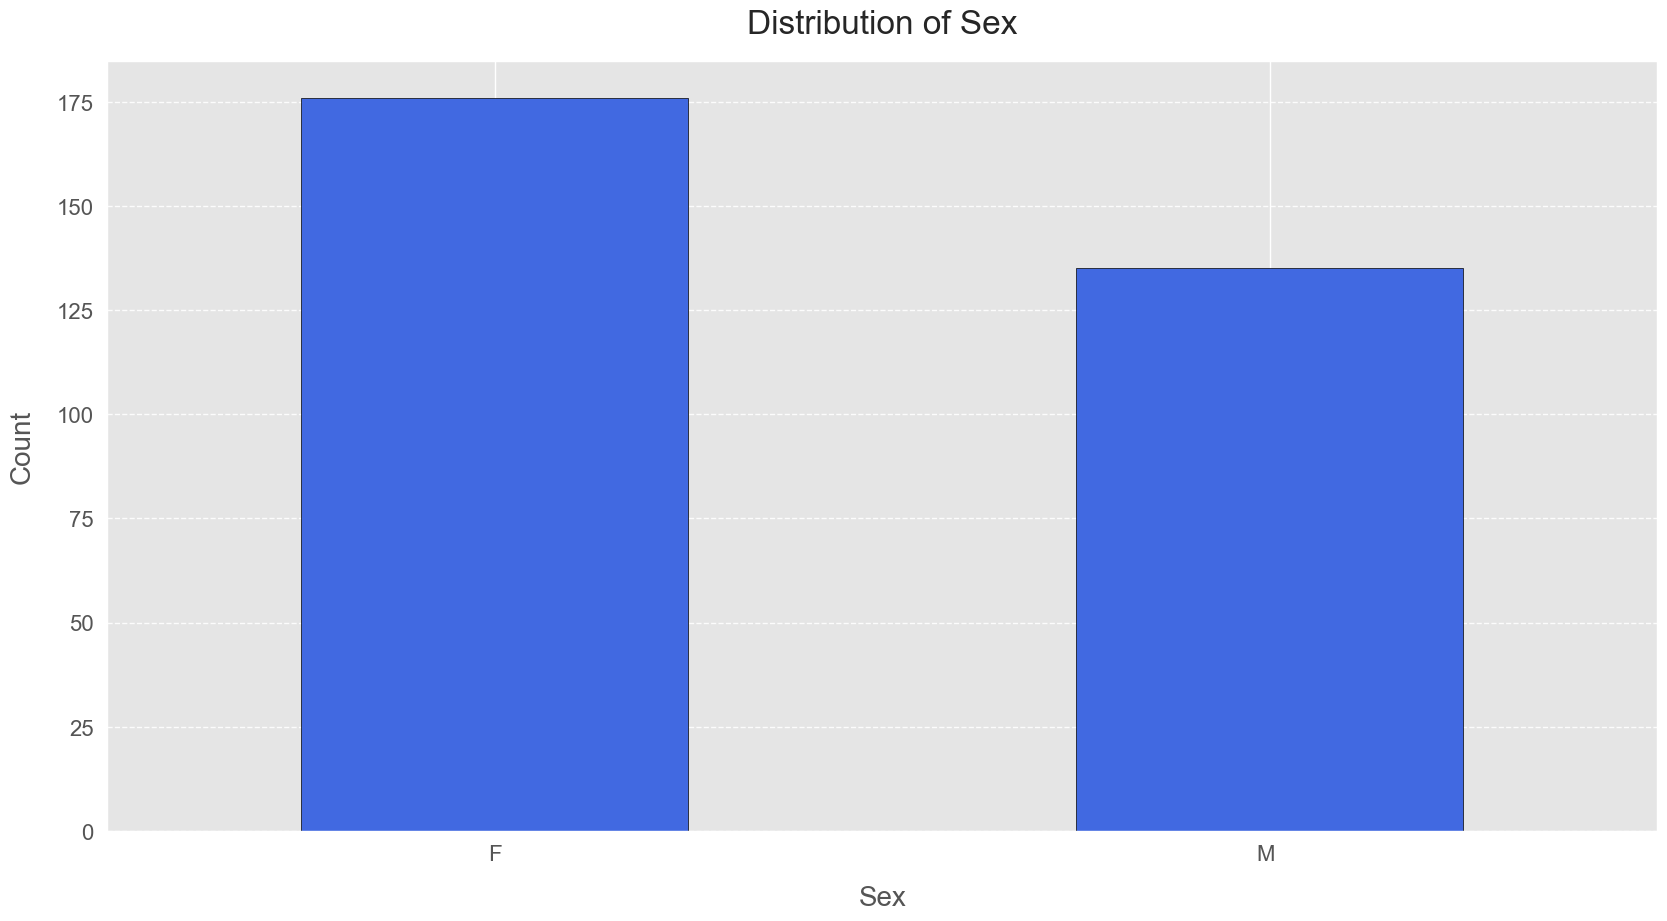

In [15]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
df["Sex"].value_counts().plot(kind="bar", color='royalblue', edgecolor='black')
plt.title('Distribution of Sex', fontsize=24, pad=20)
plt.xlabel('Sex', fontsize=20, labelpad=15)
plt.ylabel('Count', fontsize=20, labelpad=15)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()


In [16]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [17]:
df['RaceDesc'].value_counts()

RaceDesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: count, dtype: int64

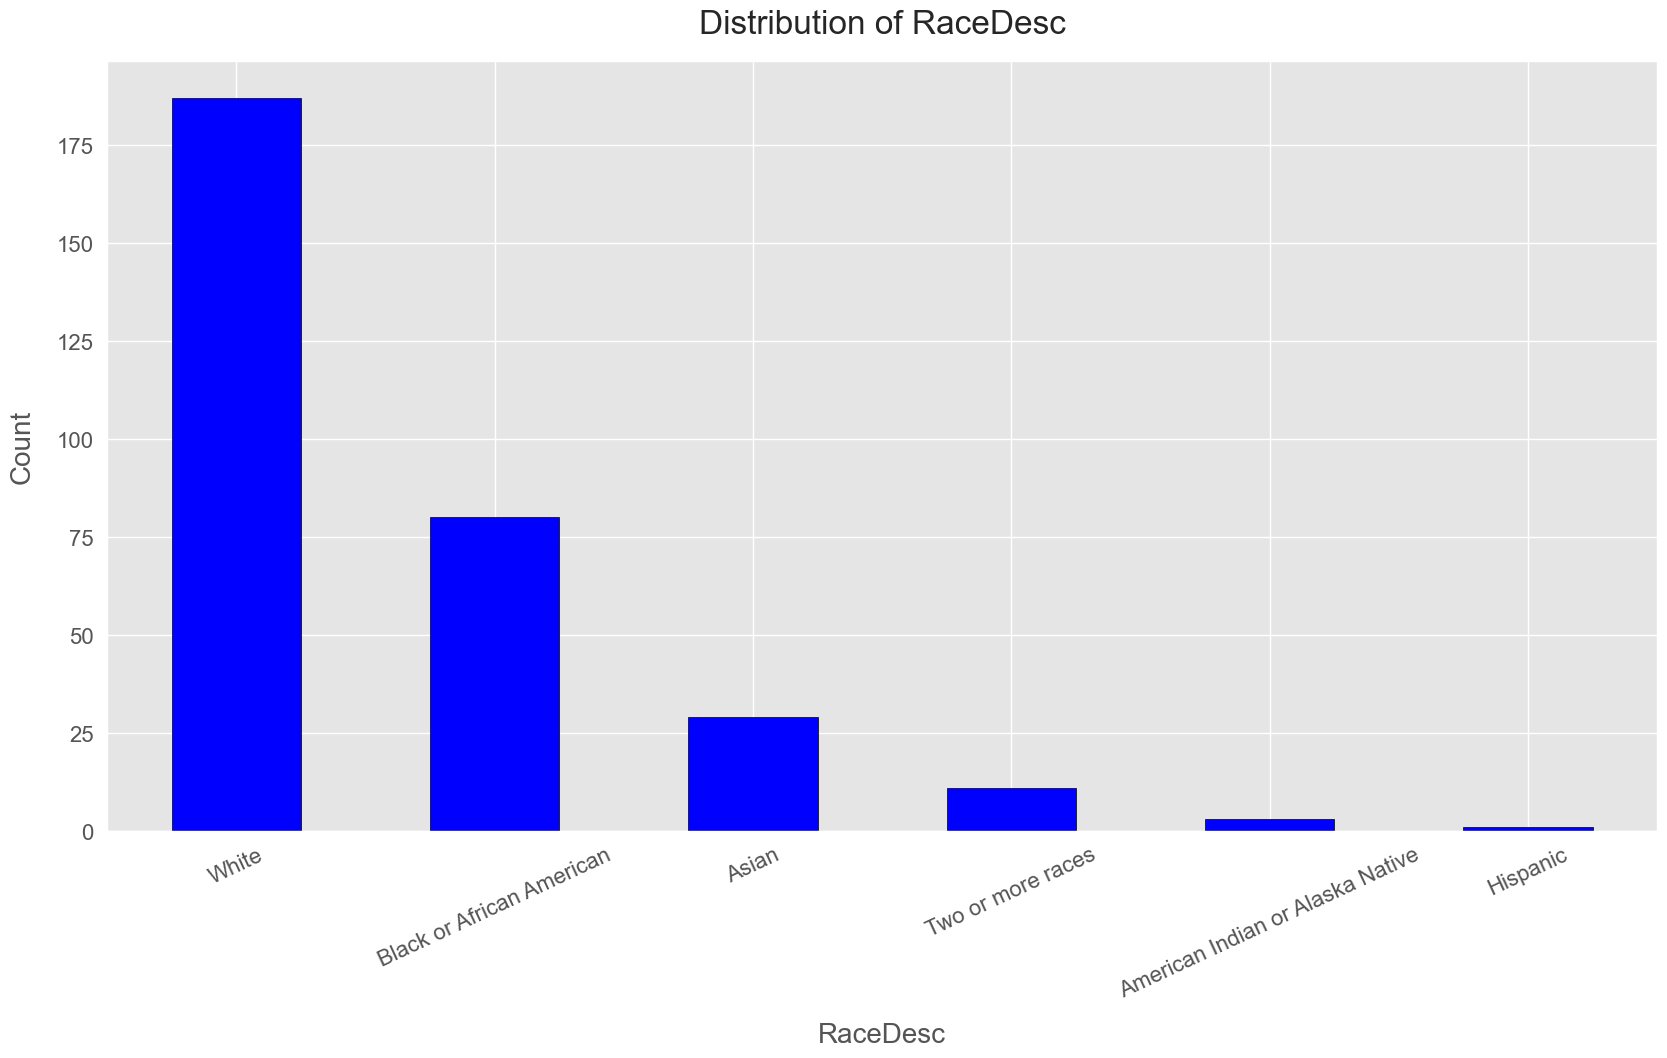

In [18]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
df["RaceDesc"].value_counts().plot(kind="bar", color='blue', edgecolor='black')
plt.title('Distribution of RaceDesc', fontsize=24, pad=20)
plt.xlabel('RaceDesc', fontsize=20, labelpad=15)
plt.ylabel('Count', fontsize=20, labelpad=15)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='-', alpha=1.0)
plt.show()

In [19]:
label = df["RecruitmentSource"].unique()

In [20]:
label

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

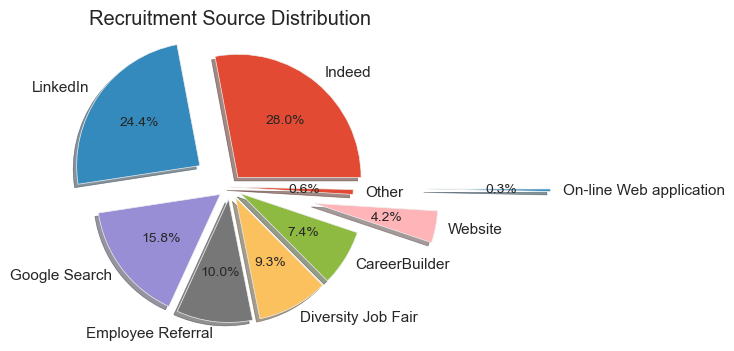

In [21]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 4))
df['RecruitmentSource'].value_counts().plot.pie(
    explode=[0.1, 0.3, 0.1, 0.1, 0.1, 0.1, 0.7,0,1.6], 
    autopct="%1.1f%%",
    shadow=True,
    ax=ax
)
ax.set_title('Recruitment Source Distribution')
ax.set_ylabel('')
ax.set_aspect('equal')

plt.show()


In [22]:
label1 = df["PerformanceScore"].unique()

In [23]:
label1

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

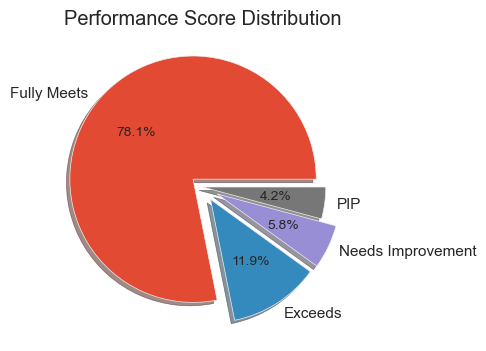

In [24]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 4))
df['PerformanceScore'].value_counts().plot.pie(
    explode=[0.1,0.12,0.13,0], 
    autopct="%1.1f%%",
    shadow=True,
    ax=ax
)
ax.set_title('Performance Score Distribution')
ax.set_ylabel('')
ax.set_aspect('equal')

plt.show()


In [25]:
label = df["Department"].unique()

In [26]:
label

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

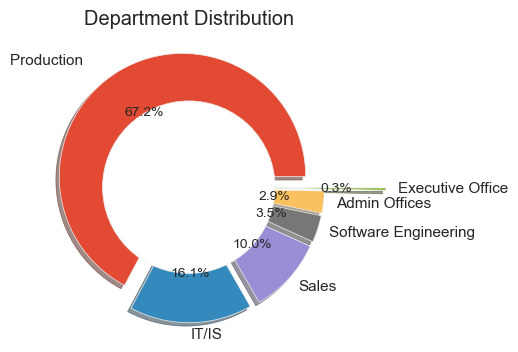

In [27]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 4))
df['Department'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.6], 
    autopct="%1.1f%%",
    shadow=True,
    ax=ax
)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(center_circle)
ax.set_title('Department Distribution')
ax.set_ylabel('')
ax.set_aspect('equal')
plt.show()


In [28]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [29]:
df1 = df[["Sex","Department","RaceDesc","Salary","PerformanceScore"]]

In [30]:
df1

,Sex,Department,RaceDesc,Salary,PerformanceScore
0,M,Production,White,62506,Exceeds
1,M,IT/IS,White,104437,Fully Meets
2,F,Production,White,64955,Fully Meets
3,F,Production,White,64991,Fully Meets
4,F,Production,White,50825,Fully Meets
...,...,...,...,...,...
306,M,Production,White,65893,Fully Meets
307,F,Production,Asian,48513,PIP
308,F,IT/IS,White,220450,Exceeds
309,F,IT/IS,White,89292,Fully Meets


In [31]:
df1.isnull().sum()

Sex                 0
Department          0
RaceDesc            0
Salary              0
PerformanceScore    0
dtype: int64

In [32]:
df1.duplicated().sum()

0

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               311 non-null    object
 1   Department        311 non-null    object
 2   RaceDesc          311 non-null    object
 3   Salary            311 non-null    int64 
 4   PerformanceScore  311 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.3+ KB


In [34]:
df['Salary'].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [36]:
df1["PerformanceScore"] = labelencoder.fit_transform(df["PerformanceScore"])

In [37]:
df1["Sex"] = labelencoder.fit_transform(df["Sex"])

In [38]:
df1

,Sex,Department,RaceDesc,Salary,PerformanceScore
0,1,Production,White,62506,0
1,1,IT/IS,White,104437,1
2,0,Production,White,64955,1
3,0,Production,White,64991,1
4,0,Production,White,50825,1
...,...,...,...,...,...
306,1,Production,White,65893,1
307,0,Production,Asian,48513,3
308,0,IT/IS,White,220450,0
309,0,IT/IS,White,89292,1


In [39]:
df1["Department"] = labelencoder.fit_transform(df["Department"])
df1["RaceDesc"] = labelencoder.fit_transform(df["RaceDesc"])

In [40]:
df1

,Sex,Department,RaceDesc,Salary,PerformanceScore
0,1,3,5,62506,0
1,1,2,5,104437,1
2,0,3,5,64955,1
3,0,3,5,64991,1
4,0,3,5,50825,1
...,...,...,...,...,...
306,1,3,5,65893,1
307,0,3,1,48513,3
308,0,2,5,220450,0
309,0,2,5,89292,1


In [41]:
df1.corr()["PerformanceScore"].sort_values(ascending = True)

Salary             -0.125138
RaceDesc            0.005621
Sex                 0.054915
Department          0.057614
PerformanceScore    1.000000
Name: PerformanceScore, dtype: float64

<Axes: >

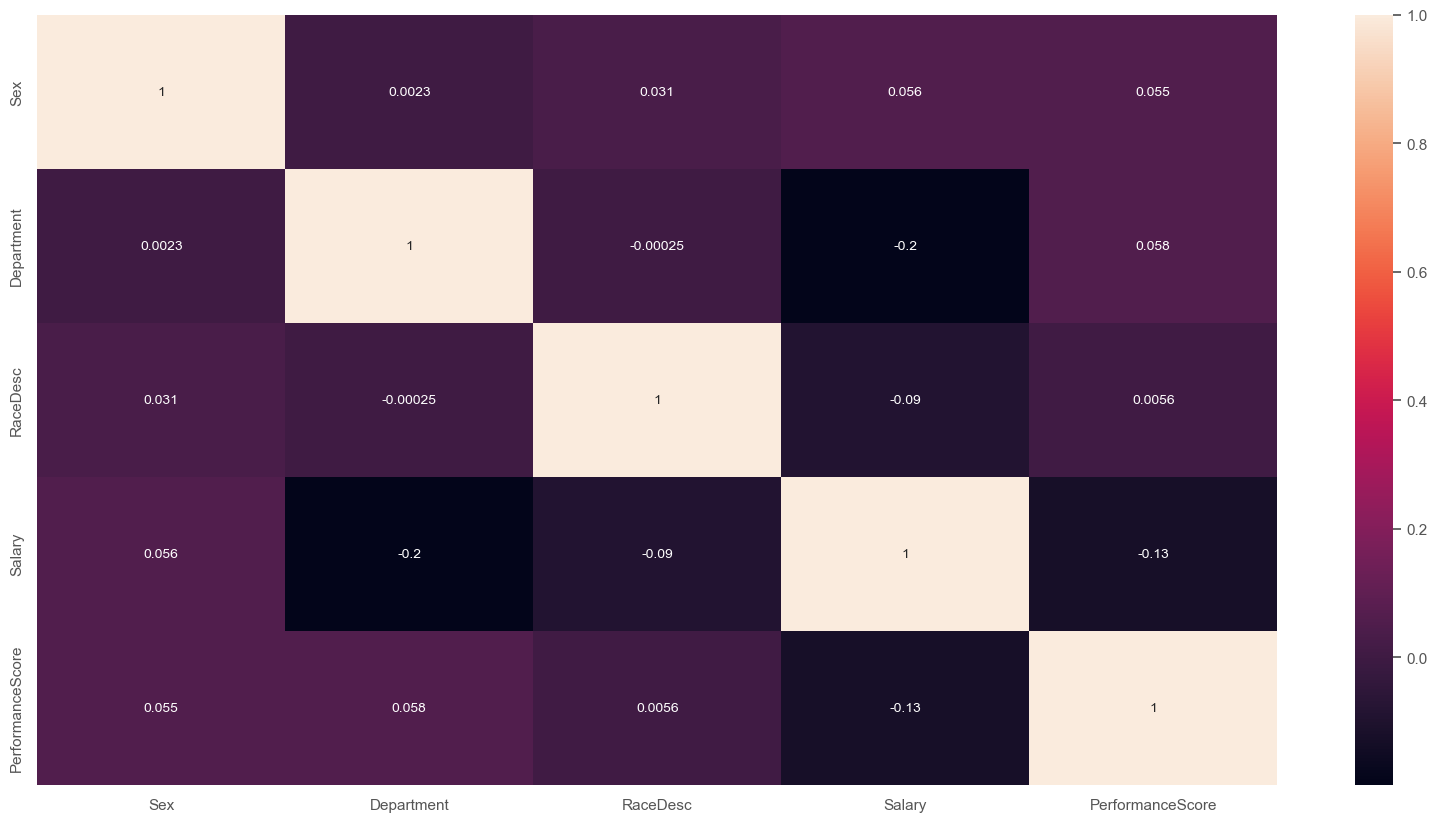

In [42]:
import seaborn as sns
sns.heatmap(data = df1.corr(), annot = True)

In [43]:
df1.columns

Index(['Sex', 'Department', 'RaceDesc', 'Salary', 'PerformanceScore'], dtype='object')

In [44]:
X = df1[["Sex", "Department", "RaceDesc", "Salary"]]
y = df1[["PerformanceScore"]]

In [45]:
X

,Sex,Department,RaceDesc,Salary
0,1,3,5,62506
1,1,2,5,104437
2,0,3,5,64955
3,0,3,5,64991
4,0,3,5,50825
...,...,...,...,...
306,1,3,5,65893
307,0,3,1,48513
308,0,2,5,220450
309,0,2,5,89292


In [46]:
y

,PerformanceScore
0,0
1,1
2,1
3,1
4,1
...,...
306,1
307,3
308,0
309,1


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [48]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [50]:
accuracy_score(y_train, log_reg.predict(X_train))

0.7926267281105991

In [51]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [52]:
confusion_matrix(y_test, y_pred)

array([[ 0, 16,  0,  0],
       [ 0, 71,  0,  0],
       [ 0,  6,  0,  0],
       [ 0,  1,  0,  0]], dtype=int64)

In [53]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

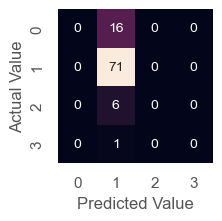

In [54]:
plot_confusion_matrix(y_test, y_pred)

In [55]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))

0.8110599078341014
0.7659574468085106


In [56]:
confusion_matrix(y_test, y_pred)

array([[ 1, 15,  0,  0],
       [ 1, 70,  0,  0],
       [ 0,  5,  1,  0],
       [ 0,  1,  0,  0]], dtype=int64)

In [57]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

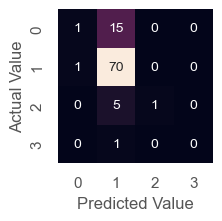

In [58]:
plot_confusion_matrix(y_test, y_pred)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.77      0.99      0.86        71
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         1

    accuracy                           0.77        94
   macro avg       0.57      0.30      0.32        94
weighted avg       0.73      0.77      0.69        94



In [60]:
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [61]:
#use to find best parameter
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [62]:
grid_search.best_score_

0.792600422832981

In [63]:
svc = SVC(C=10, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))

0.7926267281105991
0.7553191489361702


In [64]:
print(confusion_matrix(y_test, y_pred))

[[ 0 16  0  0]
 [ 0 71  0  0]
 [ 0  6  0  0]
 [ 0  1  0  0]]


In [65]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

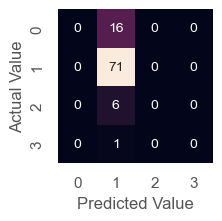

In [66]:
plot_confusion_matrix(y_test, y_pred)

In [67]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
print(accuracy_score(y_test, DT.predict(X_test)))

1.0
0.5638297872340425


In [68]:
print(confusion_matrix(y_test, y_pred))

[[ 1 13  2  0]
 [ 7 52  6  6]
 [ 1  5  0  0]
 [ 0  1  0  0]]


In [69]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

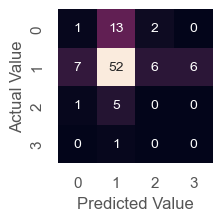

In [70]:
plot_confusion_matrix(y_test, y_pred)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.06      0.08        16
           1       0.73      0.73      0.73        71
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1

    accuracy                           0.56        94
   macro avg       0.21      0.20      0.20        94
weighted avg       0.57      0.56      0.57        94



In [72]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [73]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

In [74]:
grid_search_dt.best_score_

0.7919999999999999

In [75]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7926267281105991
0.7553191489361702
[[ 0 16  0  0]
 [ 0 71  0  0]
 [ 0  6  0  0]
 [ 0  1  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.76      1.00      0.86        71
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1

    accuracy                           0.76        94
   macro avg       0.19      0.25      0.22        94
weighted avg       0.57      0.76      0.65        94



In [76]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [77]:
y_pred = rand_clf.predict(X_test)

In [78]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))

0.8387096774193549
0.723404255319149


In [79]:
print(confusion_matrix(y_test, y_pred))

[[ 0 16  0  0]
 [ 2 68  0  1]
 [ 0  6  0  0]
 [ 0  1  0  0]]


In [80]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

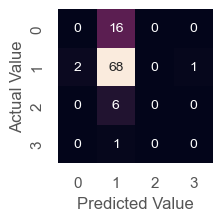

In [81]:
plot_confusion_matrix(y_test, y_pred)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.75      0.96      0.84        71
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1

    accuracy                           0.72        94
   macro avg       0.19      0.24      0.21        94
weighted avg       0.56      0.72      0.63        94



In [83]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))

0.8525345622119815
0.6702127659574468


In [85]:
print(confusion_matrix(y_test, y_pred))

[[ 2 14  0  0]
 [ 8 61  0  2]
 [ 0  6  0  0]
 [ 0  1  0  0]]


In [86]:
def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

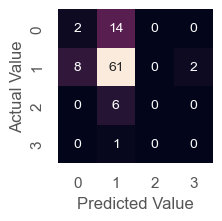

In [87]:
plot_confusion_matrix(y_test, y_pred)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.12      0.15        16
           1       0.74      0.86      0.80        71
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1

    accuracy                           0.67        94
   macro avg       0.24      0.25      0.24        94
weighted avg       0.60      0.67      0.63        94



In [89]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,76.60
0,Logistic Regression,75.53
2,SVM,75.53
3,Decision Tree Classifier,75.53
4,Random Forest Classifier,72.34
5,XgBoost,67.02
